In [1]:
import json, requests, warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

#### ```Helper```

In [2]:
limite = lambda sample, i : dict(list(sample.items())[:i])

urutan = lambda sample :  dict(sorted(sample.items(), key=lambda item: item[1], reverse=ontrue))

jatelp = lambda sample : [] if not sample else [i.strip() for i in sample.split(",")]

ratata = lambda sample : sum(sample) // len(sample)

nolist = lambda i, operati : 0 if not i else len(operati(i))

#### ```General```

In [3]:
mrturl = "https://jakartamrt.co.id/id/val/stasiuns"

opener = requests.get(mrturl)

opener = opener.json()

In [4]:
total = len(opener)

total

13

In [5]:
inputi = opener[5]

len(inputi.keys())

16

In [6]:
title = inputi["title"]

title

'Stasiun Blok M BCA'

#### ```Antar Modas```

In [7]:
split = "\r\n\r\n"; repl = "\r\n"

interi = lambda i : [i.replace(repl, " ") for i in i.split(split)]

operator = interi(inputi["antarmodas"])

len(operator)

15

In [8]:
operator[:1]

['Transjakarta Koridor 1, 1C, 6M, 7B, S21, S22']

In [9]:
totali = []

for i in range(total):

  l = nolist(opener[i]["antarmodas"], interi)

  if l not in totali : totali.append(l)

min(totali), max(totali)

(0, 16)

In [10]:
mili = []; mali = []

for i in range(total):

  l = nolist(opener[i]["antarmodas"], interi)

  if l == min(totali) : mili.append(opener[i]["title"])

  if l == max(totali) : mali.append(opener[i]["title"])

len(mili), len(mali)

(2, 6)

In [11]:
", ".join(mili)

'Stasiun Cipete Raya, Stasiun Haji Nawi'

In [12]:
", ".join(mali[:4])

'Stasiun Senayan Mastercard, Stasiun Istora Mandiri, Stasiun Bendungan Hilir, Stasiun Setiabudi Astra'

In [13]:
", ".join(mali[4:])

'Stasiun Dukuh Atas BNI, Stasiun Bundaran HI'

#### ```Jadwal```

```Lebak Bulus```

In [14]:
i = nolist(inputi["jadwal_lb_biasa"], jatelp)

j = nolist(inputi["jadwal_lb_libur"], jatelp)

t = i - j

i, j, t

(140, 109, 31)

In [15]:
totali = {"jadnor":[], "jadoff":[], "selisih":[]}

for i in range(total):

  l = nolist(opener[i]["jadwal_lb_biasa"], jatelp)

  j = nolist(opener[i]["jadwal_lb_libur"], jatelp)

  t = l -j

  totali["jadnor"].append(l)

  totali["jadoff"].append(j)

  totali["selisih"].append(t)

ratata(totali["jadnor"]), ratata(totali["jadoff"]), ratata(totali["selisih"])

(130, 100, 30)

```Bundaran Hotel Indonesia```

In [16]:
i = nolist(inputi["jadwal_hi_biasa"], jatelp)

j = nolist(inputi["jadwal_hi_libur"], jatelp)

t = i - j

i, j, t

(142, 110, 32)

In [17]:
totali = {"jadnor":[], "jadoff":[], "selisih":[]}

for i in range(total):

  l = nolist(opener[i]["jadwal_hi_biasa"], jatelp)

  j = nolist(opener[i]["jadwal_hi_libur"], jatelp)

  t = l - j

  totali["jadnor"].append(l)

  totali["jadoff"].append(j)

  totali["selisih"].append(t)

ratata(totali["jadnor"]), ratata(totali["jadoff"]), ratata(totali["selisih"])

(131, 100, 31)

#### ```Retail```

```0```

In [18]:
retail = inputi["retails"]

len(retail)

7

In [19]:
totalretail = {}

for i in range(total):

  l = len(opener[i]["retails"])

  t = opener[i]["title"]

  totalretail[t] = l

tore = sum(totalretail.values())

totalretail = urutan(totalretail)

totalretail = limite(totalretail, 3)

In [20]:
tore

73

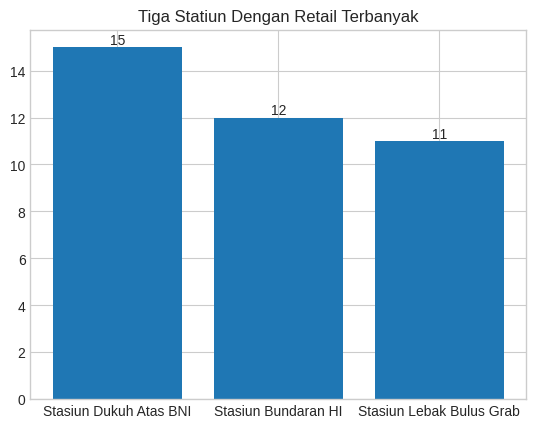

In [21]:
plot, ax = plt.subplots()

ax.bar(totalretail.keys(), totalretail.values())

ax.bar_label(ax.containers[0])

ax.set_title("Tiga Statiun Dengan Retail Terbanyak");

```1```

In [22]:
reti = ["Umkm", "Atm", "Retail", "Fashion", "Makanan", "Mesin Top Up", "Vending Machine", "Unclass"]

retailer = {i:0 for i in reti}

for i in range(total):

  retail = opener[i]["retails"]

  for ret in retail:

    jenis = ret["jenis_retail"]

    if not jenis: jenis = "Unclass"

    jenis = [i.capitalize() for i in jenis.strip().split(" ")]

    jenis = " ".join(jenis)

    if jenis == "Fesyen": jenis = "Fashion"

    retailer[jenis] += 1

retailer = urutan(retailer)

retailer = limite(retailer, 4)

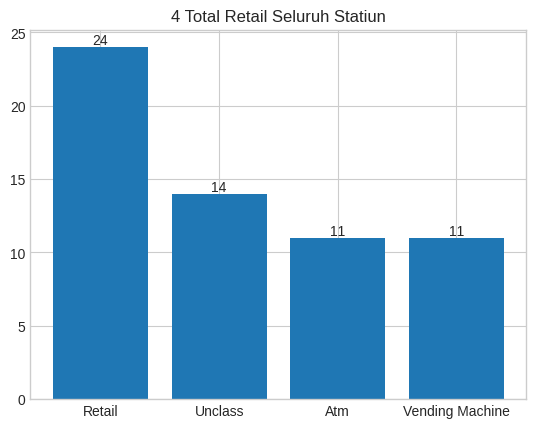

In [23]:
plot, ax = plt.subplots()

ax.bar(retailer.keys(), retailer.values())

ax.bar_label(ax.containers[0])

ax.set_title("4 Total Retail Seluruh Statiun");

#### ```Out Facility```

```0```

In [24]:
totalout = {}

for i in range(total):

  l = len(opener[i]["fasilitas"])

  t = opener[i]["title"]

  totalout[t] = l

tolu = sum(totalout.values())

totalout = urutan(totalout)

totalout = limite(totalout, 3)

In [25]:
tolu

70

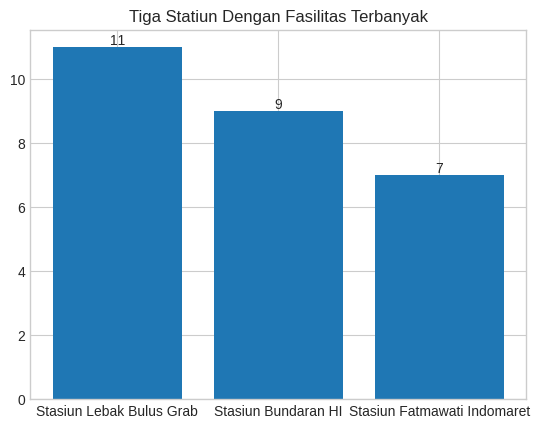

In [26]:
plot, ax = plt.subplots()

ax.bar(totalout.keys(), totalout.values())

ax.bar_label(ax.containers[0])

ax.set_title("Tiga Statiun Dengan Fasilitas Terbanyak");

```1```

In [27]:
support = {"Coworking Space":0, "Penginapan":0, "Restoran":0}

for i in range(total):

  supporting = opener[i]["fasilitas"]

  for sup in supporting:

    jenis = sup["jenis_fasilitas"]

    jenis = [t.capitalize() for t in jenis.strip().split(" ")]

    jenis = " ".join(jenis)

    support[jenis] += 1

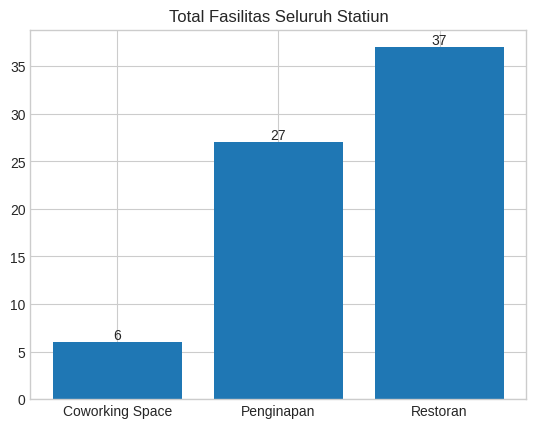

In [28]:
plot, ax = plt.subplots()

ax.bar(support.keys(), support.values())

ax.bar_label(ax.containers[0])

ax.set_title("Total Fasilitas Seluruh Statiun");

#### ```Perjalanan```

In [29]:
timer = []

tarif = []

for i in range(total):

  perjalanan = opener[i]["estimasi"]

  for jalan in perjalanan:

    j, t = int(jalan["waktu"]), int(jalan["tarif"])

    if j not in timer: timer.append(j)

    if t not in tarif: tarif.append(t)

In [30]:
durasi_terlama = max(timer)

durasi_terlama

29

In [31]:
durasi_tersingkat = min(timer)

durasi_tersingkat

2

In [32]:
tarif_tertinggi = max(tarif)

tarif_tertinggi

14000

In [33]:
tarif_terendah = min(tarif)

tarif_terendah

3000